In [38]:
import numpy as np
import pandas as pd

from scipy.optimize import curve_fit
import plotly.graph_objects as go

from sklearn.metrics import mean_squared_error

In [3]:
curvas = pd.read_csv("data/cycles_all.dat", sep=";")
curvas.head()

,tau,ciclo_a2,ciclo_a5,ciclo_a6,ciclo_a7,ciclo_a8,ciclo_b1,ciclo_b3,ciclo_b4,ciclo_b5,ciclo_b6,ciclo_b7,ciclo_b8,mean_val,deviat
0,0.000,0.08368,0.18706,0.30749,0.05260,0.34916,0.16852,0.27118,0.08369,0.29095,0.13081,0.25767,0.12464,0.192287,0.095814
1,0.025,0.12953,0.08763,0.34628,0.21379,0.29988,0.18610,0.26174,0.10273,0.29575,0.15733,0.23871,0.12954,0.204084,0.081586
2,0.050,0.17098,0.03246,0.37614,0.25630,0.27057,0.19487,0.25435,0.11379,0.30898,0.16531,0.22313,0.13855,0.208786,0.088959
3,0.075,0.20778,0.14464,0.36757,0.29937,0.25198,0.21350,0.24226,0.12341,0.33622,0.17093,0.24315,0.14899,0.229150,0.073758
4,0.100,0.24753,0.17777,0.37192,0.30343,0.27563,0.22031,0.23840,0.13273,0.35841,0.18315,0.27509,0.16420,0.245714,0.072088


In [24]:
def fisher(x, c1, c2):
    return 0.5 + 0.5*np.tanh(c1*x - c2)

def landau(x, c1, c2):
    return np.sqrt(0.5 + 0.5*np.tanh(c1*x - c2))

def gompertz(x, c1, c2):
    return np.exp(-c1*np.exp(-c2*x))

In [25]:
fisher_coef = {"ciclo_a6":[1.575,0.626],
        "ciclo_a7":[1.755,0.722],
        "ciclo_a5":[3.206,1.551],
        "ciclo_a8":[1.849,0.838],
        "ciclo_a2":[2.611,0.840],
        "ciclo_b1":[2.569,0.820],
        "ciclo_b3":[2.648,1.028],
        "ciclo_b4":[3.735,1.549],
        "ciclo_b5":[1.875,0.490],
        "ciclo_b6":[2.616,0.826],
        "ciclo_b7":[2.864,0.834],
        "ciclo_b8":[3.326,1.183]}
x = curvas.tau
modelos = {}
for un_ciclo in fisher_coef:
    c1, c2 = fisher_coef[un_ciclo]
    modelos[un_ciclo] = fisher(x, c1, c2)

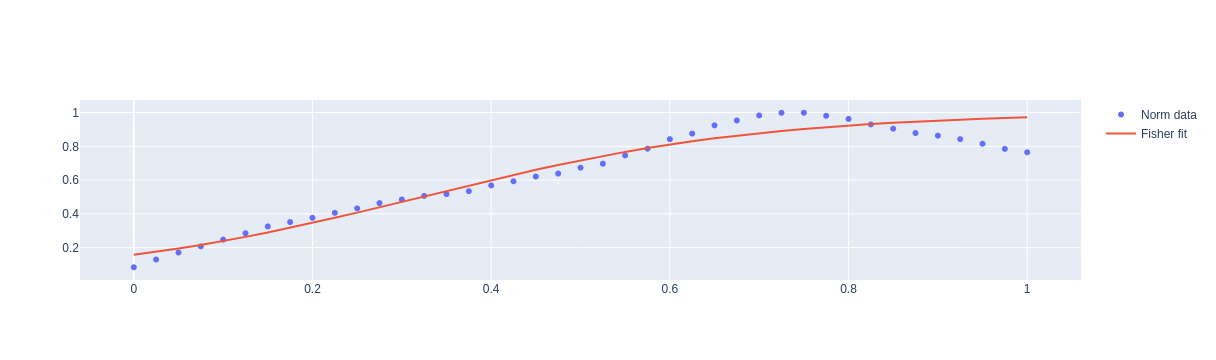

In [26]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = x, y = curvas["ciclo_a2"], mode="markers", name="Norm data"))
fig.add_trace(go.Scatter(x = x, y = modelos["ciclo_a2"], mode="lines", name="Fisher fit"))

In [44]:
# ajustes para ambos modelos
y_mean = curvas.mean_val.to_numpy()

fisher_params, fisher_tcov = curve_fit(fisher, x, y_mean)
landau_params, landau_tcov = curve_fit(landau, x, y_mean)
gompertz_params, gompertz_tcov = curve_fit(gompertz, x, y_mean)

y_fisher = fisher(x, *fisher_params)
y_landau = landau(x, *landau_params)
y_gompertz = gompertz(x, *gompertz_params)

rmse_fisher = np.sqrt(mean_squared_error(y_mean, y_fisher))
rmse_landau = np.sqrt(mean_squared_error(y_mean, y_landau))
rmse_gompertz = np.sqrt(mean_squared_error(y_mean, y_gompertz))

In [71]:
rmse_gompertz

0.033374733520125356

In [72]:
rmse_landau 

0.019534691782079044

In [73]:
rmse_fisher

0.018341609219938593

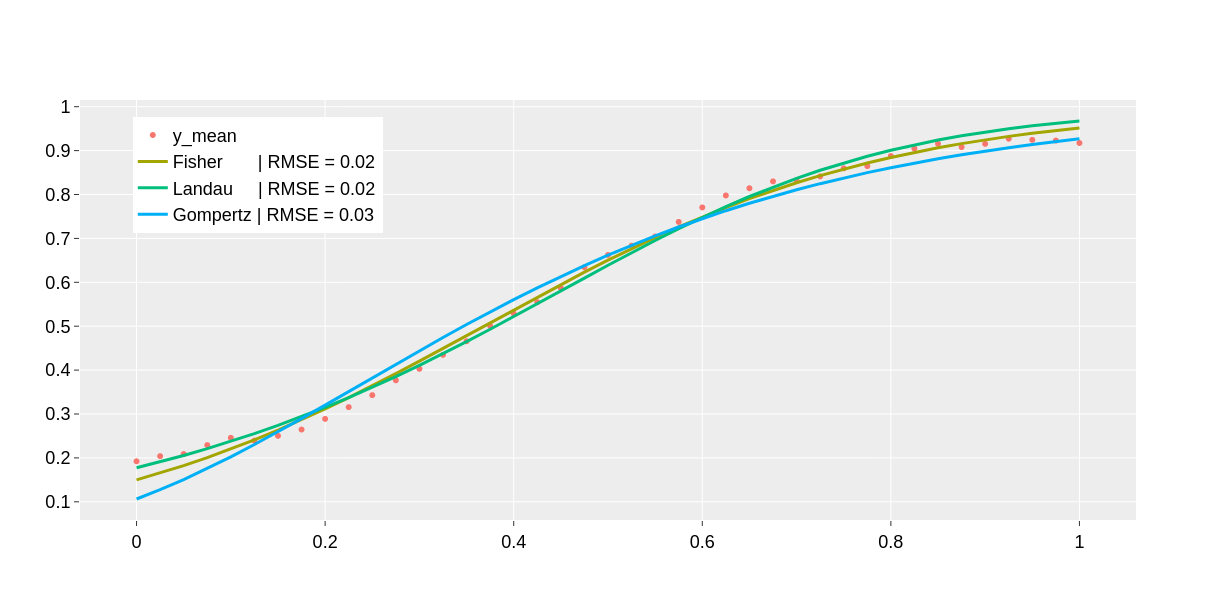

In [67]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = x, y = y_mean, mode="markers", name="y_mean"))
fig.add_trace(go.Scatter(x = x, y = y_fisher, mode="lines", name=f"Fisher       | RMSE = {rmse_fisher:.2f}"))
fig.add_trace(go.Scatter(x = x, y = y_landau, mode="lines", name=f"Landau     | RMSE = {rmse_landau:.2f}"))
fig.add_trace(go.Scatter(x = x, y = y_gompertz, mode="lines", name=f"Gompertz | RMSE = {rmse_gompertz:.2f}"))

fig.update_layout(template="ggplot2", width=700, height=600,legend=dict(x=0.05, y=0.96, orientation='v'))
fig.update_layout(font = dict(size=18, color='black'))
fig.update_traces(line={'width': 3})